# MNIST Dataset

---

## 1. Overview 

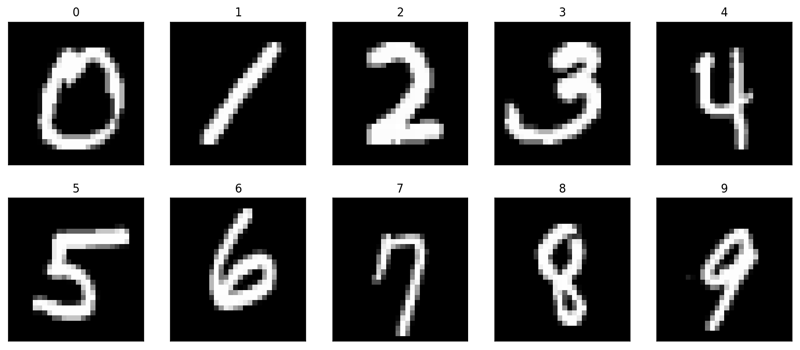

In [19]:
from PIL import Image
filename = "./Materials/Images/mnist.png"
#原著論文から引用
im = Image.open(filename)
im.resize((800, 350))

- 0から9までの手書き数字(グレースケール)のデータセット    
- 学習用画像が60000枚,テスト用画像が10000枚含まれる       
- 画像サイズは28x28, 各ピクセルの値は[0, 255]     

## 2. Usage

- ###  scikit-learn ver.

In [90]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
Bunch = fetch_openml('mnist_784')
print(Bunch["DESCR"])   

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
X, y = fetch_openml('mnist_784', return_X_y=True)   #こう書いたけど、実際にはas_frame=Trueだけ設定してBunchで取得した方がいい,理由は以下
#return_X_y=Falseとするとsklearn.utils.Bunch型で帰ってくるが、こうすることでDataFrame型のdataとlabelに分けてくれる
#ただし、学習用画像とテスト用画像が一緒くたになっているので自分で分割する必要がある
#Bunch = fetch_openml('mnist_784',return_X_y=False)  #defaltでFalse,これは勝手に分割してくれている  

>[sklearn.datasets.fetch_openml(Official)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)

In [3]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [4]:
X.shape, y.shape   #Xはそれぞれのデータの各ピクセルの値を、yはそのラベル(数字)を保持

((70000, 784), (70000,))

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 784pixel = 28pixel * 28pixel

In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

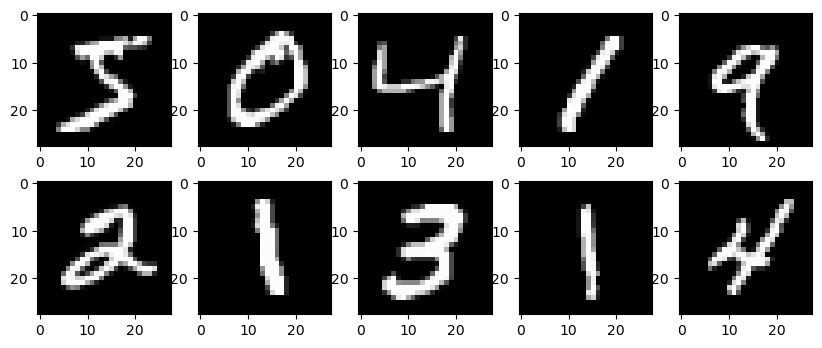

In [9]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.gray()   #grayスケールに変更,こうして明示してやらないと通常変換をして白が黄色で表示される
    plt.imshow(X.iloc[i,:].values.reshape(28, 28))
    #plt.axis("off")   #軸を消したい場合

>[【よくわかる】モノクロ・白黒・グレースケールの違い](https://www.shinkohsha.co.jp/blog/monochrome-shirokuro-grayscale/)   
>[jupyter notebookでOpenCV 3.1を動かす(2)](https://takacity.blog.fc2.com/blog-entry-142.html)

- ### Keras ver.

In [67]:
from tensorflow.keras.datasets import mnist

#60,000枚の28x28，10個の数字の白黒画像と10,000枚のテスト用画像データセットが自動で分割される
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

>[データセット - Keras Documentationhttps://keras.io › datasets(Official)](https://keras.io/ja/datasets/)

In [70]:
type(train_images), type(train_labels), type(test_images), type(test_labels)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [72]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [73]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [76]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [77]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [78]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

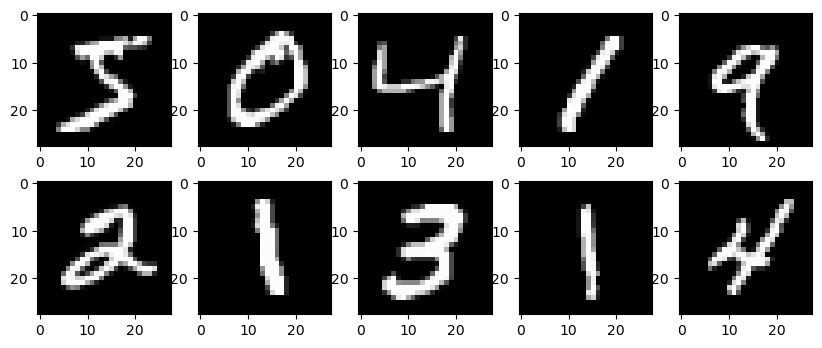

In [89]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.gray()   #grayスケールに変更,こうして明示してやらないと通常変換をして白が黄色で表示される
    plt.imshow(train_images[i].reshape(28, 28))
    #plt.axis("off")   #軸を消したい場合

### References
>[Keras で MNIST データの学習を試してみよう](https://weblabo.oscasierra.net/python/keras-mnist-sample.html)

## References
>[MNISTの使い方まとめ](https://kakedashi-engineer.appspot.com/2020/02/10/mnist/)      
>[手書き数字のデータを扱う！Pythonでmnistを使う方法【初心者向け】](https://magazine.techacademy.jp/magazine/18981)